<a href="https://colab.research.google.com/github/SWS-swapnilsingh/MNIST-BaggingcCassifier-and-RandomForest-classifier/blob/main/MNIST_with_decision_tress_and_ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this colab, we will implement **multiclass MNIST digit recognition classifier** with **decision trees** and **ensemble techniques**.

In [ ]:
#common imports
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, ShuffleSplit
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.pipeline import Pipeline

Loading MNIST Dataset

In [ ]:
#loading data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


As you know there are 60000 examples in training and 10000 examples in the test set.

Each example is a grey scale image of size 28X28. There are 10 labels-one for each digi-0 to 9.

In [ ]:
print(f'''
training data: {X_train.shape}
training label: {y_train.shape}
test data: {X_test.shape}
test data: {y_test.shape}

''')


training data: (60000, 28, 28)
training label: (60000,)
test data: (10000, 28, 28)
test data: (10000,)




In [ ]:
# Flatten each input image into a vector of length 784
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

# Normalizing
X_train = X_train/255
X_test = X_test/255

In [ ]:
print(f'''
train data: {X_train.shape}
test data: {X_test.shape}
''')


train data: (60000, 784)
test data: (10000, 784)



We use `ShuffleSplit` cross validation with 10 splits and 20% data set aside for model evaluation as a test data.

In [ ]:
# we are going to use ShuffleSplit cross validation for better training purpose.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

We define two functions:
1. `train_classifiers` contains a common code for training classifiers for MNIST multiclass classification problem.
  * It takes `estimator`, feature matrix, labels, cross validation strategy and name of the classifier as input.
  * It first fits the estimator with feature matrix and labels.
  * It obtains cross validated `f1_macro` score for training set with 10-fold `ShuffleSplit` cross validation and prints it.

In [ ]:
# utility function that helps us training a classifier and gives macro f1_score on traning dataset
def train_classifiers(estimator, X_train, y_train, cv, name):
  estimator.fit(X_train, y_train)
  cv_train_score = cross_val_score(estimator, X_train, y_train,
                                   cv=2, scoring='f1_macro', n_jobs=-1)
  print(f"On an average, {name} model has f1 score of"
        f"{cv_train_score.mean():.3f} +/- {cv_train_score.std():.3f} on the training set.")

2. The `eval` function takes estimator, test feature matrix and labels as input and produce classification report and confuction matrix.
  * It first predicts labels for the test set.
  * Then it uses these predicted reports for calculating various evaluation metrics like precision, recall, f1 score and accuracy for each of the 10 classes.
  * It also obtains a confusion matrix by comparing these predictions with the actual labels and displays it with `ConfusionMatrixDisplay` utility.

In [ ]:
# this is a utility function that helps us in evaluating a classifier
def eval(estimator, X_test, y_test):
  y_pred = estimator.predict(X_test)

  print("# Classification report")
  print(classification_report(y_test, y_pred))

  print("# Confusion matrix")
  disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
  disp.plot()
  plt.title('Confusion matrix')
  plt.show()

Let's train three classifiers with default parameters.
* Decision tree
* Bagging classifier - which uses decision tree as a default classifier and trains multiple decision tree classifiers on different bags obtained through bootstrap sampling of training set.
* Random forest classifier - which is also a bagging technique, which trains different decision tree classifiers by randomly selecting attributes for splitting on bags of boostrap sample of training set.

In [ ]:
#Decision trees
decision_tree_pipeline = Pipeline([('classifier', DecisionTreeClassifier())])
train_classifiers(decision_tree_pipeline, X_train, y_train.ravel(), cv, "decision tree")

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


On an average, decision tree model has f1 score of0.846 +/- 0.001 on the training set.


# Classification report
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       980
           1       0.96      0.96      0.96      1135
           2       0.87      0.86      0.86      1032
           3       0.83      0.85      0.84      1010
           4       0.87      0.87      0.87       982
           5       0.84      0.84      0.84       892
           6       0.89      0.89      0.89       958
           7       0.91      0.90      0.91      1028
           8       0.81      0.81      0.81       974
           9       0.87      0.85      0.86      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

# Confusion matrix


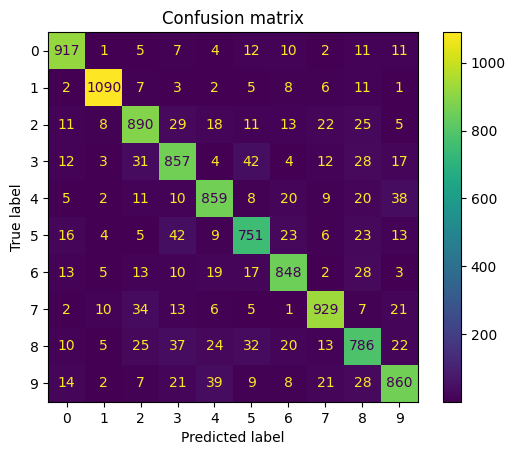

In [ ]:
# Let's evaluate the trained classifier on the test set.
eval(decision_tree_pipeline, X_test, y_test)

MNIST classification with Bagging

In [ ]:
#bagging classifier
bagging_pipeline = Pipeline([("classifier", BaggingClassifier(n_jobs=-1))])
train_classifiers(bagging_pipeline, X_train, y_train.ravel(), cv, "bagging")

On an average, bagging model has f1 score of0.917 +/- 0.000 on the training set.


# Classification report
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       980
           1       0.97      0.99      0.98      1135
           2       0.93      0.94      0.94      1032
           3       0.92      0.93      0.92      1010
           4       0.93      0.94      0.94       982
           5       0.94      0.91      0.92       892
           6       0.96      0.94      0.95       958
           7       0.96      0.95      0.96      1028
           8       0.93      0.90      0.92       974
           9       0.93      0.91      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

# Confusion matrix


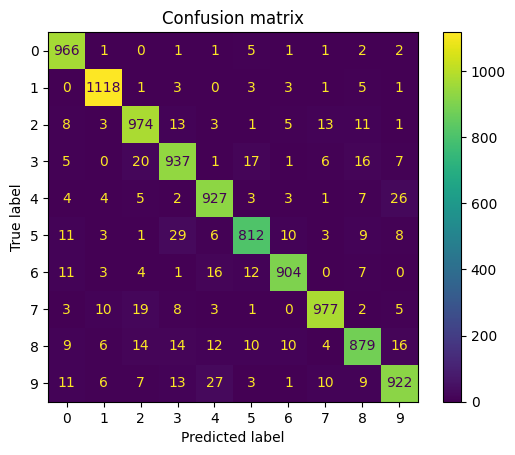

In [ ]:
# Let's evaluate the trained classifier on the test set.
eval(bagging_pipeline, X_test, y_test)

Random forest for MNIST multicalss classification

In [ ]:
# random forest
random_forest_pipeline = Pipeline([("classifier", RandomForestClassifier())])
train_classifiers(random_forest_pipeline, X_train, y_train.ravel(), cv, "random forest")

On an average, random forest model has f1 score of0.961 +/- 0.002 on the training set.


# Classification report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.97      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

# Confusion matrix


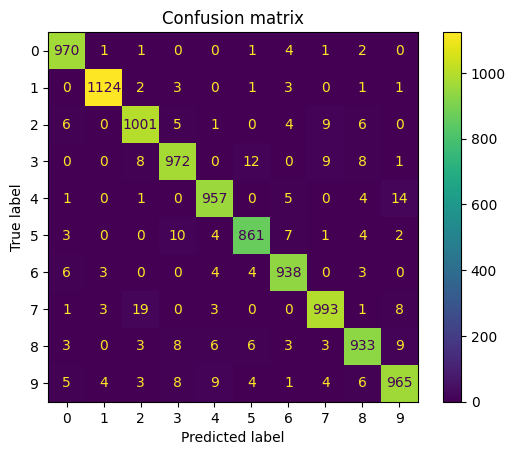

In [ ]:
eval(random_forest_pipeline, X_test, y_test)

## Summary
* We trained three multi-class classifiers for handwritten digit recognition.
* The decision tree classifier is a baseline classifier, which obtained accuracy of 88% on the test set.
* Using bagging and training the same decision tree classifier gave us an increase of 6 percentage point in the accuracy, which translates to 94% accuracy on the test set.
* Finally random forest pushed that further to 97%.
* We can see that how ensemble techniques give better results on the classification task compared to a single classifier.
